In [1]:
import os
import sys
cwd = os.getcwd()
ooipy_dir = os.path.dirname(os.path.dirname(cwd)) + '/ooipy'
sys.path.append(ooipy_dir)

import ooipy
from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import pickle
import scipy
from gwpy.timeseries import TimeSeries
import seaborn as sns
import gwpy
import progressbar
import scipy.io

cwd = os.getcwd()
ni_dir = os.path.dirname(cwd)
sys.path.append(ni_dir)

from Modules import analysis

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
file_name = "/Users/jhrag/Code/Noise_Interferometry/NCFs/MJ03F-MJ03E/2017"
exp1 = analysis.NCCF_experiment(file_name, verbose=True)

Start Time: 2016-01-01 00:00:00
Frequency Range: [ 1 90]
Hydrophone Type: low_frequency
Number of Average Periods: 8760
Node 1: Central_Caldera
Node 2: Eastern_Caldera
Window Length (s): 30
Signal Processing Method: sabra_b
Specific Notes: Butterworth and Hann Window for whitening. Longterm Analysis
Distance Between Nodes: 3.186 km
Bearing from node 1 to 2: 121.6 °


[                                                                        ]   1%

Entire Average Period Invalid


[========================================================================] 100%

array([[         nan],
       [ 10.17158632],
       [  8.54355058],
       ..., 
       [ 21.14882898],
       [ 21.14349045],
       [ 21.14127282]])

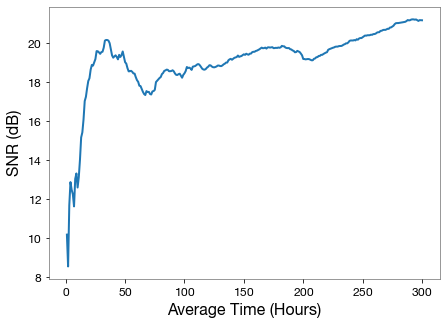

In [14]:
exp1.SNR_plot(8000,8300,plot=True)

In [17]:
SNR = []
for k in range(24):
    start = k*365
    end = (k+1)*365
    print(f'Calculating SNR for hours {start} to {end}...')
    SNR.append(exp1.SNR_plot(start,end, plot=False))

[=============                                                           ]  19%

Calculating SNR for hours 0 to 365...
Entire Average Period Invalid


[=============                                                           ]  19%

Calculating SNR for hours 365 to 730...
Entire Average Period Invalid


[=============                                                           ]  19%

Calculating SNR for hours 730 to 1095...
Entire Average Period Invalid


[==============                                                          ]  20%

Calculating SNR for hours 1095 to 1460...
Entire Average Period Invalid


[=============                                                           ]  19%

Calculating SNR for hours 1460 to 1825...
Entire Average Period Invalid


[===============                                                         ]  21%

Calculating SNR for hours 1825 to 2190...
Entire Average Period Invalid


[=============                                                           ]  19%

Calculating SNR for hours 2190 to 2555...
Entire Average Period Invalid


[=============                                                           ]  19%

Calculating SNR for hours 2555 to 2920...
Entire Average Period Invalid


[=============                                                           ]  19%

Calculating SNR for hours 2920 to 3285...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 3285 to 3650...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 3650 to 4015...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 4015 to 4380...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 4380 to 4745...
Entire Average Period Invalid


[=                                                                       ]   2%

Calculating SNR for hours 4745 to 5110...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 5110 to 5475...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 5475 to 5840...
Entire Average Period Invalid


[=                                                                       ]   2%

Calculating SNR for hours 5840 to 6205...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 6205 to 6570...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 6570 to 6935...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 6935 to 7300...
Entire Average Period Invalid


[=                                                                       ]   2%

Calculating SNR for hours 7300 to 7665...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 7665 to 8030...
Entire Average Period Invalid


[=============                                                           ]  19%

Calculating SNR for hours 8030 to 8395...
Entire Average Period Invalid


[                                                                        ]   1%

Calculating SNR for hours 8395 to 8760...
Entire Average Period Invalid


[========================================================================] 100%

In [26]:
code_dir = os.path.dirname(os.path.dirname(cwd))

sys.path.append(code_dir)
from compute_spectrograms import spec_tools
spec_dir = "/Volumes/John's Passport/Spectrograms/Central_Caldera/2017"

In [30]:
times, freq, values = spec_tools.merge(0,365,spec_dir)

[======================================================================= ]  98%

In [32]:
# Generate alternate time variables
from datetime import timedelta

times_delta = []
times_new = np.zeros((len(times),1))
for k in range(len(times)):
    times_delta.append(times[k]-times[0])
    
    times_new[k] = times_delta[k].days*24 + times_delta[k].seconds/3600


times_new = np.squeeze(times_new)

print(np.shape(times_new))

(19985,)


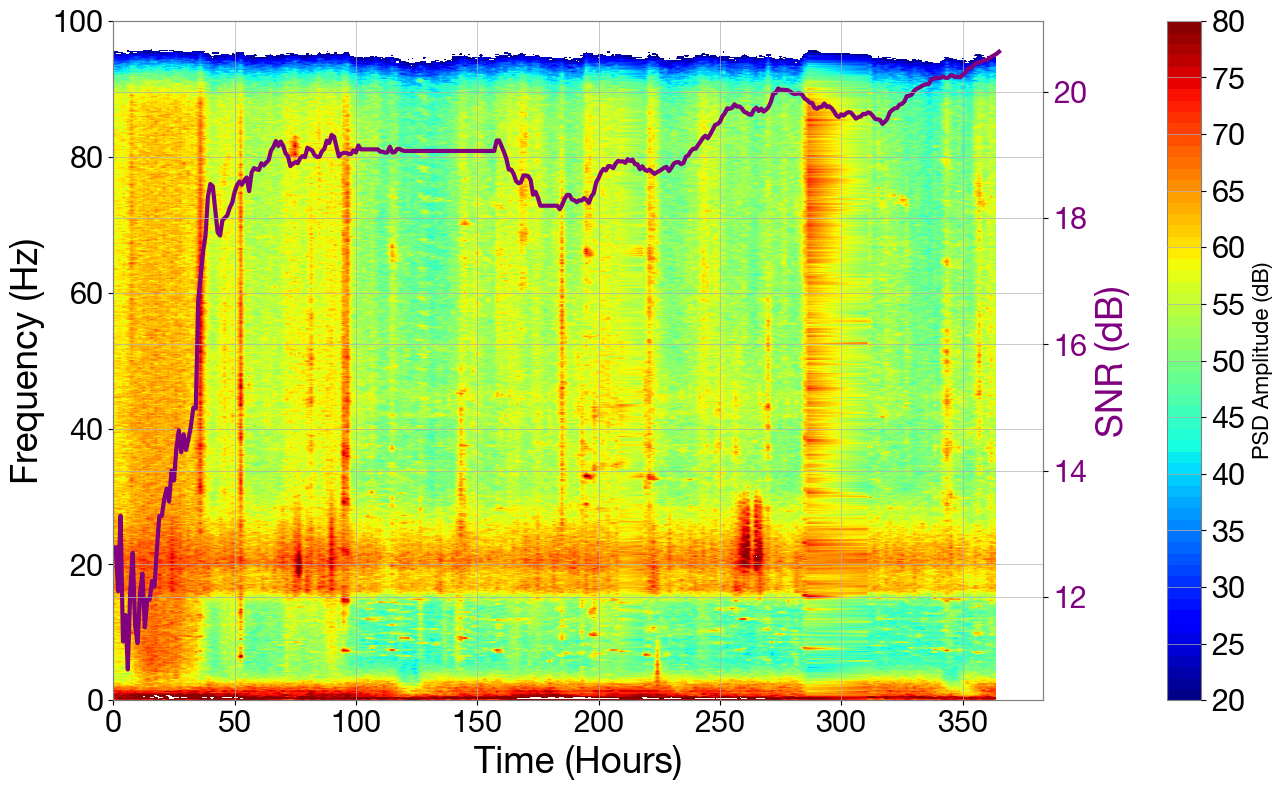

In [35]:
import matplotlib.colors as colors
import matplotlib

sns.reset_orig()
vmin = 20
vmax = 80
vdelta = 1
figsize = (16,9)
dpi = 100
fmin = 0
fmax = 100
time_limits = None
xlabel_rot = 0
time = times_new
ylabel = 'Frequency (Hz)'
xlabel = 'Time (Hours)'
vdelta_cbar = 5

res_reduction_time = 100
res_reduction_freq = 1


font = {'size': 22}
matplotlib.rc('font', **font)
        
v = values[::res_reduction_time, ::res_reduction_freq]

if len(time) != len(values):
    t = np.linspace(0, len(values) - 1,
                    int(len(values) / res_reduction_time))
else:
    t = time[::res_reduction_time]
            
        
if len(freq) != len(values[0]):
    f = np.linspace(0, len(values[0]) - 1,
                    int(len(values[0]) / res_reduction_freq))
else:
    f = freq[::res_reduction_freq]
            
cbarticks = np.arange(vmin, vmax + vdelta, vdelta)
fig, ax = plt.subplots(figsize=(figsize), dpi=dpi)
im = ax.contourf(t, f, np.transpose(v), cbarticks,
                 norm=colors.Normalize(vmin=vmin, vmax=vmax),
                 cmap=plt.cm.jet)
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.ylim([fmin, fmax])
if time_limits is not None:
    plt.xlim(time_limits)
plt.xticks(rotation=xlabel_rot)
#plt.title(title)
cbar = plt.colorbar(im, ax=ax,
             ticks=np.arange(vmin, vmax + vdelta, vdelta_cbar), pad=0.1)

cbar.ax.set_ylabel('PSD Amplitude (dB)', rotation=90, fontsize='16')
plt.tick_params(axis='y')


# Add SNR Plot
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'purple'
ax2.set_ylabel('SNR (dB)', color=color)  # we already handled the x-label with ax1
ax2.plot(SNR[0], color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

fig.savefig('SNR_and_Spectrogram_butter_whiten.png',dpi=dpi)

# Debug


In [50]:
code_dir = os.path.dirname(os.path.dirname(cwd))

sys.path.append(code_dir)
from compute_spectrograms import spec_tools
spec_dir = "/Volumes/John's Passport/Spectrograms/Central_Caldera/2017"

In [51]:
times, freq, values = spec_tools.merge(1095,1460,spec_dir)

[======================================================================= ]  98%

In [52]:

spec_full = ooipy.hydrophone.basic.Spectrogram(times, freq, values)

In [46]:
import datetime

start = datetime.datetime(2017,1,1,0,0,0)
end = datetime.datetime(2017,1,2,0,0,0)
test = np.linspace(start.timestamp(),end.timestamp(),365)

In [47]:
test2 = []
for k in range(len(test)):
    test2.append(datetime.datetime.fromtimestamp(test[k]))
    
test2 = np.array(test2)

In [48]:
test2.shape

(365,)

In [28]:
np.datetime64(start)

numpy.datetime64('2017-01-01T00:00:00.000000')

In [53]:
spec_full